# TPC 9 - Treino de Modelos

## Imports

In [1]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
sentences_hpcam = []
sentences_hpp = []

with open(r'data/Harry_Potter_Camara_Secreta-br.txt', encoding='utf-8') as f:
    for line in f:
        sent = list(gensim.utils.tokenize(line, lower=True))
        sentences_hpcam.append(sent)

with open(r'data/Harry_Potter_e_A_Pedra_Filosofal.txt', encoding='utf-8') as f:
    for line in f:
        sent = list(gensim.utils.tokenize(line, lower=True))
        sentences_hpp.append(sent)


model = Word2Vec(sentences_hpcam + sentences_hpp, vector_size=300, window=5, min_count=1, sg=1, epochs=20, workers=3)
model.wv.save_word2vec_format("models/model_harry.txt", binary=False)

In [3]:
def get_word(word):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '"+word+"' does not appear in this model")


## Vetores

In [4]:
print("Vetor da palavra 'coruja':")
print(get_word('coruja'))
print("--------------------------------------------------------------------------")

print("Vetor da palavra 'varinha':")
print(get_word('coruja'))
print("--------------------------------------------------------------------------")

Vetor da palavra 'coruja':
[ 9.21783447e-02 -5.48122264e-03 -5.33290729e-02  1.53531492e-01
  1.21045128e-01 -2.17468932e-01  1.95811793e-01  2.32617810e-01
 -1.46669582e-01  3.82967736e-03  1.01309054e-01  8.93778726e-02
  6.03659451e-02 -8.19071010e-02  8.27802718e-02 -3.12067777e-01
 -3.92045416e-02 -1.52482897e-01  6.52497681e-03 -1.58989176e-01
 -1.58965215e-01  4.99640778e-02  1.63305163e-01  2.99582809e-01
 -1.61218449e-01 -1.60422981e-01 -1.51270062e-01 -1.05236590e-01
 -8.63896459e-02 -1.32642388e-01  2.11332366e-01  1.45513033e-02
  3.15263718e-01 -2.15486258e-01 -5.23503534e-02  1.58769548e-01
  1.40696177e-02 -2.89308459e-01 -3.09739351e-01  7.62201799e-03
 -6.81741070e-03 -4.26372960e-02 -4.60213944e-02 -1.23706952e-01
 -3.52474526e-02  1.31672934e-01  2.81557161e-02 -4.72013745e-03
 -4.40790206e-02  8.17546844e-02  7.37250000e-02 -4.96842153e-02
 -4.98166159e-02 -1.23388551e-01 -3.69683921e-01  3.84078324e-01
  6.28904924e-02 -2.65759051e-01 -3.91872264e-02 -3.30088824e-0

## Intrusos

In [5]:
print("Palavra que não combina [dobby, harry, brocas]:")
print(model.wv.doesnt_match(["dobby", "harry", "brocas"]))
print("-------------------------------------------")

print("Palavra que não combina [harry, voldemort, amizade]:")
print(model.wv.doesnt_match(["harry", "voldemort", "amizade"]))
print("-------------------------------------------")

Palavra que não combina [dobby, harry, brocas]:
brocas
-------------------------------------------
Palavra que não combina [harry, voldemort, amizade]:
harry
-------------------------------------------


## Palavras Similares

In [6]:
print("Palavras mais similares a 'hogwarts':")
print(model.wv.most_similar("hogwarts"))
print("----------------------")

print("Palavras mais similares a 'magia':")
print(model.wv.most_similar("magia"))
print("----------------------")

print("Palavras mais similares a 'vassoura':")
print(model.wv.most_similar("vassoura"))
print("----------------------")

Palavras mais similares a 'hogwarts':
[('expresso', 0.6784592270851135), ('bruxaria', 0.6378915905952454), ('setembro', 0.6331793665885925), ('hoggy', 0.6239421963691711), ('warty', 0.6229666471481323), ('frequentar', 0.6138100028038025), ('escolar', 0.6107362508773804), ('orfanato', 0.6037529706954956), ('adora', 0.5984154343605042), ('deverão', 0.5921216607093811)]
----------------------
Palavras mais similares a 'magia':
[('negra', 0.7387568354606628), ('moderna', 0.737228274345398), ('ensinada', 0.7368422150611877), ('bruxaria', 0.7352164387702942), ('hébridas', 0.6960352063179016), ('matéria', 0.6877135038375854), ('ministro', 0.6835930347442627), ('elixir', 0.672200083732605), ('seção', 0.6721728444099426), ('usar', 0.660764753818512)]
----------------------
Palavras mais similares a 'vassoura':
[('montou', 0.6498154401779175), ('mochila', 0.6471113562583923), ('cabo', 0.6307157874107361), ('página', 0.6304851174354553), ('carteira', 0.6274848580360413), ('erguera', 0.61835414171

## Relações

In [7]:
print("Palavras relacionadas positivamente e negativamente [harry + magia - trouxas]:")
print(model.wv.most_similar(positive=["harry", "magia"], negative=["trouxas"]))
print("----------------------")

print("Palavras relacionadas positivamente e negativamente [hogwarts + amizade - voldmort]:")
print(model.wv.most_similar(positive=["hogwarts", "amizade"], negative=["voldemort"]))
print("----------------------")

print("Palavras relacionadas positivamente e negativamente [harry + coragem - medo]:")
print(model.wv.most_similar(positive=["harry", "coragem"], negative=["medo"]))
print("----------------------")

Palavras relacionadas positivamente e negativamente [harry + magia - trouxas]:
[('cantar', 0.5184969305992126), ('invisibilidade', 0.5086086392402649), ('fechadura', 0.49542099237442017), ('enfermaria', 0.4884917438030243), ('seco', 0.4779220223426819), ('mudando', 0.47057971358299255), ('rasgada', 0.4686868488788605), ('agarrar', 0.4668397903442383), ('edwiges', 0.46508318185806274), ('travessa', 0.4626266360282898)]
----------------------
Palavras relacionadas positivamente e negativamente [hogwarts + amizade - voldmort]:
[('warty', 0.6710941195487976), ('sugiro', 0.661628007888794), ('hoggy', 0.6599271297454834), ('tolos', 0.6500198245048523), ('hã', 0.6495393514633179), ('morando', 0.6490119099617004), ('frequentar', 0.6444429755210876), ('bruxarias', 0.6441473364830017), ('contaram', 0.6412590146064758), ('malucos', 0.6395708918571472)]
----------------------
Palavras relacionadas positivamente e negativamente [harry + coragem - medo]:
[('sonolento', 0.5821555256843567), ('senhori

## Similaridade

In [8]:
print("Similaridade entre 'voldemort' e 'dumbledore':")
print(model.wv.similarity("voldemort", "dumbledore"))
print("-----------------------------------------------")

print("Similaridade entre 'harry' e 'ron':")
print(model.wv.similarity("harry", "ron"))
print("-----------------------------------------------")

print("Similaridade entre 'voldemort' e 'malfoy':")
print(model.wv.similarity("voldemort", "malfoy"))
print("-----------------------------------------------")

print("Similaridade entre 'dobby' e 'edwiges':")
print(model.wv.similarity("dobby", "edwiges"))
print("-----------------------------------------------")

Similaridade entre 'voldemort' e 'dumbledore':
0.3924447
-----------------------------------------------
Similaridade entre 'harry' e 'ron':
0.4359257
-----------------------------------------------
Similaridade entre 'voldemort' e 'malfoy':
0.19865683
-----------------------------------------------
Similaridade entre 'dobby' e 'edwiges':
0.18835993
-----------------------------------------------


## Proximidade

In [9]:
print("Palavras mais próximas de ['quadribol', 'vassoura']:")
print(model.wv.most_similar(positive=["quadribol", "vassoura"]))
print("-------------------------------------------------------")

print("Palavras mais próximas de ['harry', 'amizade']:")
print(model.wv.most_similar(positive=["harry", "amizade"]))
print("-------------------------------------------------------")

print("Palavras mais próximas de ['voldemort', 'medo']:")
print(model.wv.most_similar(positive=["voldemort", "medo"]))
print("-------------------------------------------------------")

Palavras mais próximas de ['quadribol', 'vassoura']:
[('temporada', 0.7307264804840088), ('partida', 0.7051812410354614), ('vitória', 0.6856434941291809), ('jogar', 0.6814520955085754), ('taça', 0.680391252040863), ('conquistar', 0.6705242991447449), ('nimbus', 0.6665158867835999), ('morra', 0.660156786441803), ('solução', 0.6579465866088867), ('equipe', 0.6570574045181274)]
-------------------------------------------------------
Palavras mais próximas de ['harry', 'amizade']:
[('balé', 0.8359125256538391), ('ajuizadamente', 0.827224612236023), ('fôssemos', 0.8262412548065186), ('machuca', 0.8260788917541504), ('frustrado', 0.8258127570152283), ('haaa', 0.8246123790740967), ('terminei', 0.8239062428474426), ('selvageria', 0.8234595060348511), ('maçarico', 0.8206700086593628), ('quite', 0.8206449151039124)]
-------------------------------------------------------
Palavras mais próximas de ['voldemort', 'medo']:
[('descoberto', 0.7857580184936523), ('ousou', 0.7742276191711426), ('pensass

In [10]:
print("Palavras mais próximas de 'trouxas':")
print(model.wv.most_similar("trouxas"))
print("-------------------------------------------------------")

print("Palavras mais próximas de 'castelo':")
print(model.wv.most_similar("castelo"))
print("-------------------------------------------------------")

Palavras mais próximas de 'trouxas':
[('nascidos', 0.7408171892166138), ('bruxos', 0.7149358987808228), ('famílias', 0.7073726058006287), ('chamavam', 0.695475161075592), ('donos', 0.6848228573799133), ('trocando', 0.670975923538208), ('apreciador', 0.6493206024169922), ('família', 0.6452085375785828), ('melhores', 0.6451717019081116), ('bobalhão', 0.6437167525291443)]
-------------------------------------------------------
Palavras mais próximas de 'castelo':
[('levavam', 0.6539016962051392), ('terceiro', 0.640842080116272), ('entravam', 0.6304938793182373), ('comendo', 0.6165986657142639), ('desimpedir', 0.6164672374725342), ('mesmíssimo', 0.6161702871322632), ('deixaram', 0.615820050239563), ('apinhado', 0.6147826910018921), ('patamar', 0.6130440831184387), ('folhear', 0.6120153665542603)]
-------------------------------------------------------


## Distância

In [11]:
print("Distância entre 'harry' e 'duda':")
print(model.wv.distance("harry", "duda"))
print("----------------------")

print("Distância entre 'quadribol' e 'vassoura':")
print(model.wv.distance("quadribol", "vassoura"))
print("----------------------")

Distância entre 'harry' e 'duda':
0.7532534301280975
----------------------
Distância entre 'quadribol' e 'vassoura':
0.6194850206375122
----------------------


## Visualização

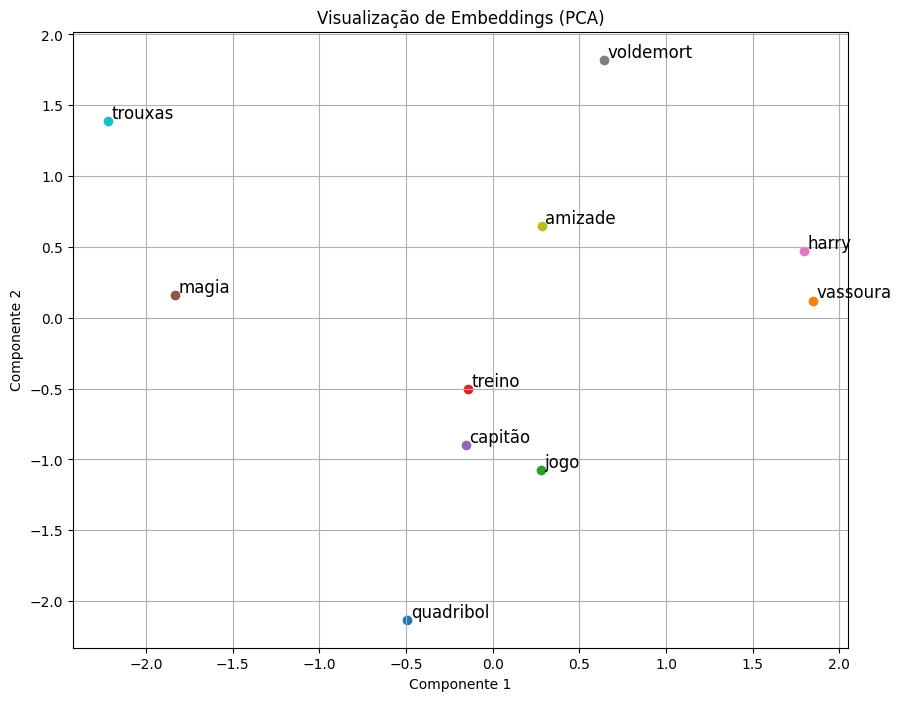

In [12]:
words = ["quadribol", "vassoura", "jogo", "treino", "capitão", "magia", "harry", "voldemort", "amizade", "trouxas"]
word_vectors = [model.wv[word] for word in words]


pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)


plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

plt.title("Visualização de Embeddings (PCA)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()